## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set plot size
plt.rcParams["figure.figsize"] = (6, 4)

# read analysis file
df = pd.read_csv("analysis.csv")

# print shape and preview
print("shape:", df.shape)
df.head()

shape: (2092, 29)


,bcr_patient_barcode,path,img_id,series,inst,thick,pxsp,stage,pathologic_T,pathologic_N,...,pathologic_T_clin,pathologic_N_clin,pathologic_M_clin,clinical_stage_clin,tumor_grade_clin,histologic_diagnosis_clin,age_at_initial_pathologic_diagnosis_clin,os_time_days_clin,os_event_clin,status_last_clin
0,TCGA-BP-5181,Dataset/total/TCGA-KIRC/TCGA-BP-5181/05-24-199...,2-13,3,51,5.0,"[0.710938, 0.710938]",Stage I,T1b,NX,...,T1b,NX,M0,[Not Applicable],G2,Kidney Clear Cell Renal Carcinoma,58,1495.0,0,TUMOR FREE
1,TCGA-BP-5181,Dataset/total/TCGA-KIRC/TCGA-BP-5181/05-24-199...,2-07,3,45,5.0,"[0.710938, 0.710938]",Stage I,T1b,NX,...,T1b,NX,M0,[Not Applicable],G2,Kidney Clear Cell Renal Carcinoma,58,1495.0,0,TUMOR FREE
2,TCGA-BP-5181,Dataset/total/TCGA-KIRC/TCGA-BP-5181/05-24-199...,2-06,3,44,5.0,"[0.710938, 0.710938]",Stage I,T1b,NX,...,T1b,NX,M0,[Not Applicable],G2,Kidney Clear Cell Renal Carcinoma,58,1495.0,0,TUMOR FREE
3,TCGA-BP-5181,Dataset/total/TCGA-KIRC/TCGA-BP-5181/05-24-199...,2-12,3,50,5.0,"[0.710938, 0.710938]",Stage I,T1b,NX,...,T1b,NX,M0,[Not Applicable],G2,Kidney Clear Cell Renal Carcinoma,58,1495.0,0,TUMOR FREE
4,TCGA-BP-5181,Dataset/total/TCGA-KIRC/TCGA-BP-5181/05-24-199...,2-04,3,42,5.0,"[0.710938, 0.710938]",Stage I,T1b,NX,...,T1b,NX,M0,[Not Applicable],G2,Kidney Clear Cell Renal Carcinoma,58,1495.0,0,TUMOR FREE


In [3]:
# print column types
print("column dtypes:")
print(df.dtypes)

# get numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nnumeric columns:", num_cols)

# summary of numeric fields
df[num_cols].describe().T

column dtypes:
bcr_patient_barcode                          object
path                                         object
img_id                                       object
series                                        int64
inst                                          int64
thick                                       float64
pxsp                                         object
stage                                        object
pathologic_T                                 object
pathologic_N                                 object
pathologic_M                                 object
clinical_stage                               object
tumor_grade                                  object
histologic_diagnosis                         object
age_at_initial_pathologic_diagnosis           int64
os_time_days                                float64
os_event                                      int64
status_last                                  object
stage_clin                                   obje

,count,mean,std,min,25%,50%,75%,max
series,2092.0,39.757648,93.548597,1.0,4.0,5.0,6.00,605.000000
inst,2092.0,325.868069,231.349396,1.0,101.0,332.0,507.25,820.000000
thick,2092.0,3.549442,20.997809,1.0,1.5,2.5,5.00,680.090881
age_at_initial_pathologic_diagnosis,2092.0,52.497610,9.662972,40.0,43.0,58.0,60.00,79.000000
os_time_days,2092.0,1829.059751,825.145857,93.0,1495.0,1625.0,2004.00,3974.000000
os_event,2092.0,0.125717,0.331609,0.0,0.0,0.0,0.00,1.000000
age_at_initial_pathologic_diagnosis_clin,2092.0,52.497610,9.662972,40.0,43.0,58.0,60.00,79.000000
os_time_days_clin,2092.0,1829.059751,825.145857,93.0,1495.0,1625.0,2004.00,3974.000000
os_event_clin,2092.0,0.125717,0.331609,0.0,0.0,0.0,0.00,1.000000


In [4]:
# stage distribution
print("stage distribution:")
print(df["stage"].value_counts(dropna=False))

# clinical stage if available
if "stage_clin" in df.columns:
    print("\nclinical stage (stage_clin):")
    print(df["stage_clin"].value_counts(dropna=False))

# os event distribution
print("\nos_event distribution (0=censored, 1=event):")
print(df["os_event"].value_counts(dropna=False))

# tumor status at last follow-up
print("\nstatus_last distribution:")
print(df["status_last"].value_counts(dropna=False))

# clinical os_event if present
if "os_event_clin" in df.columns:
    print("\nos_event_clin distribution:")
    print(df["os_event_clin"].value_counts(dropna=False))

stage distribution:
stage
Stage I      1450
Stage IV      503
Stage III     139
Name: count, dtype: int64

clinical stage (stage_clin):
stage_clin
Stage I      1450
Stage IV      503
Stage III     139
Name: count, dtype: int64

os_event distribution (0=censored, 1=event):
os_event
0    1829
1     263
Name: count, dtype: int64

status_last distribution:
status_last
WITH TUMOR         1029
TUMOR FREE          793
[Unknown]           255
[Not Available]      15
Name: count, dtype: int64

os_event_clin distribution:
os_event_clin
0    1829
1     263
Name: count, dtype: int64


In [5]:
# columns to compute per patient
grp = {"n_img": ("img_id", "nunique"),}

# add clinical columns if present
for c in ["stage", "os_time_days", "os_event"]:
    if c in df.columns:
        grp[c] = (c, "first")

# build per-patient table
per_pt = (df.groupby("bcr_patient_barcode").agg(**grp).reset_index())

# print table shape and preview
print("per-patient table shape:", per_pt.shape)
per_pt.head()

per-patient table shape: (32, 5)


,bcr_patient_barcode,n_img,stage,os_time_days,os_event
0,TCGA-B0-5115,261,Stage IV,1604.0,0
1,TCGA-B0-5709,20,Stage III,3974.0,0
2,TCGA-B0-5812,40,Stage I,3834.0,0
3,TCGA-B8-4151,1,Stage III,1299.0,0
4,TCGA-BP-4769,4,Stage I,1876.0,0


In [6]:
# summary of number of images per patient
per_pt["n_img"].describe()

count     32.00000
mean      65.37500
std      114.25262
min        1.00000
25%        6.75000
50%       25.50000
75%       61.00000
max      505.00000
Name: n_img, dtype: float64

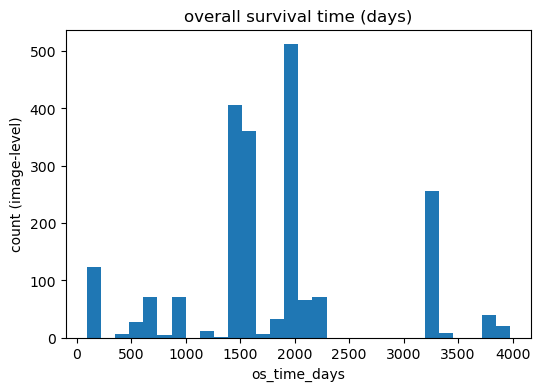

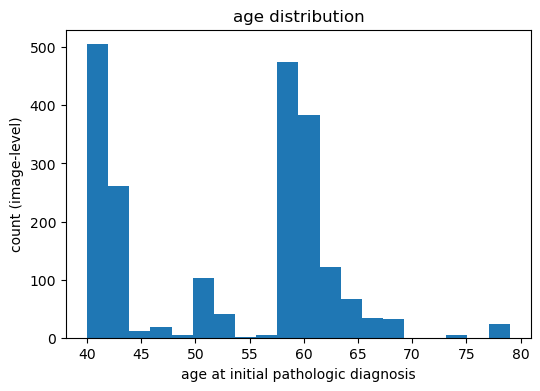

In [7]:
# histogram of survival time
plt.hist(df["os_time_days"].dropna(), bins=30)
plt.xlabel("os_time_days")
plt.ylabel("count (image-level)")
plt.title("overall survival time (days)")
plt.show()

# histogram of age
plt.hist(df["age_at_initial_pathologic_diagnosis"].dropna(), bins=20)
plt.xlabel("age at initial pathologic diagnosis")
plt.ylabel("count (image-level)")
plt.title("age distribution")
plt.show()

In [8]:
# crosstab: stage vs os_event
ct = pd.crosstab(df["stage"], df["os_event"])
print(ct)

os_event      0    1
stage               
Stage I    1408   42
Stage III   127   12
Stage IV    294  209


## Train, Val, Test Split for Patients

In [9]:
import re
from sklearn.model_selection import train_test_split

In [10]:
# rebuild per-pt table if not already in memory
if "per_pt" not in globals():
    grp = {"n_img": ("img_id", "nunique"),}
    
    for c in ["stage", "os_time_days", "os_event"]:
        if c in df.columns:
            grp[c] = (c, "first")
    per_pt = (df.groupby("bcr_patient_barcode").agg(**grp).reset_index())

# normalize stage string into I,II,III,IV
def norm_stage(s):
    """
    convert raw stage text into one of: I, II, III, IV.
    handles missing values, ignores extra text, uppercases input.

    args:
        s : original stage string

    return:
        simplified stage or nan
    """
    if pd.isna(s):
        return np.nan
    s = str(s).upper()
    if "IV" in s:
        return "IV"
    if "III" in s:
        return "III"
    if "II" in s:
        return "II"
    if "I" in s:
        return "I"
    return np.nan

# apply simplified stage
per_pt["stage_simple"] = per_pt["stage"].apply(norm_stage)

# print distribution
print("stage_simple distribution:")
print(per_pt["stage_simple"].value_counts(dropna=False))

stage_simple distribution:
stage_simple
I      19
III     7
IV      6
Name: count, dtype: int64


In [11]:
# required columns for survival, stage
req = ["stage_simple", "os_time_days", "os_event"]

# drop rows missing any required label fields
lab_df = per_pt.dropna(subset=req).copy()

# convert types
lab_df["os_time_days"] = lab_df["os_time_days"].astype(float)
lab_df["os_event"] = lab_df["os_event"].astype(int)

print("lab_df shape:", lab_df.shape)
print("\nstage distribution:")
print(lab_df["stage_simple"].value_counts())

lab_df shape: (32, 6)

stage distribution:
stage_simple
I      19
III     7
IV      6
Name: count, dtype: int64


In [12]:
# index by barcode
lab_idx = lab_df.set_index("bcr_patient_barcode")
all_id = lab_idx.index

# split into train_total/test
trv_id, te_id = train_test_split(all_id,
    test_size=0.2,
    random_state=42,
    stratify=lab_idx["stage_simple"])

# split train/val
tr_id, va_id = train_test_split(trv_id,
    test_size=0.25,
    random_state=42,
    stratify=lab_idx.loc[trv_id, "stage_simple"])

# sizes
print("train size:", len(tr_id))
print("val size:", len(va_id))
print("test size:", len(te_id))

# stage distribution
print("\nstage distribution in splits:")
for name, ids in [("train", tr_id), ("val", va_id), ("test", te_id)]:
    dist = lab_idx.loc[ids, "stage_simple"].value_counts(normalize=True)
    print(f"\n{name}:")
    print(dist)

train size: 18
val size: 7
test size: 7

stage distribution in splits:

train:
stage_simple
I      0.611111
IV     0.222222
III    0.166667
Name: proportion, dtype: float64

val:
stage_simple
I      0.571429
III    0.285714
IV     0.142857
Name: proportion, dtype: float64

test:
stage_simple
I      0.571429
III    0.285714
IV     0.142857
Name: proportion, dtype: float64


In [13]:
# assign split label to each patient
sp = {}

for pid in tr_id:
    sp[pid] = "train"
for pid in va_id:
    sp[pid] = "val"
for pid in te_id:
    sp[pid] = "test"

# map to per-patient table
per_pt["split"] = per_pt["bcr_patient_barcode"].map(sp)

# map to image-level df
df["split"] = df["bcr_patient_barcode"].map(sp)

# split counts
print("per_pt split counts:")
print(per_pt["split"].value_counts(dropna=False))

print("\nimage-level split counts:")
print(df["split"].value_counts(dropna=False))

per_pt split counts:
split
train    18
val       7
test      7
Name: count, dtype: int64

image-level split counts:
split
train    1025
test      700
val       367
Name: count, dtype: int64


## Target Image Path

In [14]:
# clean path column
pcol = "path"
df[pcol] = df[pcol].astype(str).str.strip()

# keep rows with non-empty paths
df_path = df[df[pcol].notna() & (df[pcol] != "")].copy()

print("rows with valid paths:", len(df_path))

# group image paths per patient
pt_img = (df_path.groupby("bcr_patient_barcode")[pcol].apply(list).to_dict())

print("patients with image:", len(pt_img))

rows with valid paths: 2092
patients with image: 32


In [15]:
# build list of patients for each split
def make_split(sp_name):
    """
    build a list of per-pt samples for a given split name.
    keeps only pts with images and complete labels.

    args:
        sp_name : "train", "val", or "test"

    return:
        list of dicts:
                "pt_id"   : patient id,
                "stage"   : simplified stage,
                "os_time" : survival time (float),
                "os_event": event flag (0/1),
                "img"     : list of image paths
    """
    rows = per_pt[per_pt["split"] == sp_name]
    out = []

    for _, r in rows.iterrows():
        pid = r["bcr_patient_barcode"]

        # skip patients with no images
        if pid not in pt_img or len(pt_img[pid]) == 0:
            continue

        # skip missing labels
        if (pd.isna(r["stage_simple"]) or pd.isna(r["os_time_days"]) or pd.isna(r["os_event"])):
            continue

        out.append({"pt_id": pid,
            "stage": r["stage_simple"],
            "os_time": float(r["os_time_days"]),
            "os_event": int(r["os_event"]),
            "img": pt_img[pid]})

    return out

# build split lists
tr_list = make_split("train")
va_list = make_split("val")
te_list = make_split("test")

# print counts
print("train list:", len(tr_list))
print("val list:", len(va_list))
print("test list:", len(te_list))

train list: 18
val list: 7
test list: 7


## MIL & Cox Model Pipeline

In [16]:
import pydicom
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
from math import isnan

In [17]:
# load dicom and return cropped roi
def load_roi(p, img_size=256, crop_ratio=0.6):
    """
    load a dicom image, apply rescale slope/intercept,
    normalize to [0,1], center-crop using a ratio, resize
    to (img_size,img_size), and return float32 array.

    args:
        p : path to dicom file
        img_size : size of output image
        crop_ratio : fraction of min(h,w) to crop

    return:
        a : normalized roi, shape (img_size, img_size)
    """
    ds = pydicom.dcmread(p)
    a = ds.pixel_array.astype(np.float32)

    # apply rescale
    sl = float(getattr(ds, "RescaleSlope", 1.0))
    it = float(getattr(ds, "RescaleIntercept", 0.0))
    a = a * sl + it

    # normalize to [0,1]
    mn, mx = a.min(), a.max()
    if mx > mn:
        a = (a - mn) / (mx - mn)
    else:
        a = np.zeros_like(a, dtype=np.float32)

    # center crop
    h, w = a.shape
    side = int(min(h, w) * crop_ratio)
    y0 = (h - side) // 2
    x0 = (w - side) // 2
    a = a[y0:y0+side, x0:x0+side]

    # resize
    img = Image.fromarray((a * 255).astype(np.uint8))
    img = img.resize((img_size, img_size), Image.BILINEAR)
    a = np.asarray(img).astype(np.float32) / 255

    return a

In [18]:
# map stage to index
st_map = {"I": 0, "II": 1, "III": 2, "IV": 3}

# encode stage label
def st_enc(s):
    return st_map.get(s, -1)

# dataset for mil
class kid_mil_ds(Dataset):
    def __init__(self, lst):
        self.lst = lst

    def __len__(self):
        return len(self.lst)

    def __getitem__(self, i):
        it = self.lst[i]
        return {"pt_id": it["pt_id"],
            "stage": torch.tensor(st_enc(it["stage"]), dtype=torch.long),
            "os_time": torch.tensor(float(it["os_time"]), dtype=torch.float32),
            "os_event": torch.tensor(int(it["os_event"]), dtype=torch.float32),
            "img": it["img"]}

# collate function for mil dataloader
def mil_coll(batch):
    """
    collate fn for mil dataloader.
    groups per-pt fields into a batch without mixing image lists.

    args:
        batch : list of dicts from dataset __getitem__

    return:
        dict with:
            pt_id   : list of patient ids
            stage   : tensor of stage labels
            os_time : tensor of survival times
            os_event: tensor of event flags
            img     : list of lists of image paths
    """
    pt = [b["pt_id"] for b in batch]
    st = torch.stack([b["stage"] for b in batch], dim=0)
    tm = torch.stack([b["os_time"] for b in batch], dim=0)
    ev = torch.stack([b["os_event"] for b in batch], dim=0)
    im = [b["img"] for b in batch]

    return {"pt_id": pt,
        "stage": st,
        "os_time": tm,
        "os_event": ev,
        "img": im}

In [19]:
# build mil datasets
tr_ds = kid_mil_ds(tr_list)
va_ds = kid_mil_ds(va_list)
te_ds = kid_mil_ds(te_list)

# dataloaders
tr_ld = DataLoader(tr_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0,
    collate_fn=mil_coll)

va_ld = DataLoader(va_ds,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=mil_coll)

te_ld = DataLoader(te_ds,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=mil_coll)

In [20]:
# attention module
class att_mil(nn.Module):
    def __init__(self, in_dim, hid=128):
        super().__init__()
        self.v = nn.Linear(in_dim, hid)
        self.w = nn.Linear(hid, 1)

    def forward(self, h):
        # h: (b,n,d)
        a = self.w(torch.tanh(self.v(h)))     # (b,n,1)
        a = torch.softmax(a, dim=1)           # (b,n,1)
        m = (a * h).sum(dim=1)                # (b,d)
        return m, a.squeeze(-1)               # (b,n)

In [21]:
# mil model for stage + survival
class mil_res(nn.Module):
    def __init__(self, n_sl=9, n_st=4, img_sz=256):
        super().__init__()
        self.n_sl = n_sl
        self.img_sz = img_sz

        # backbone
        bk = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.bk = nn.Sequential(*list(bk.children())[:-1])
        self.d = bk.fc.in_features

        # attention
        self.att = att_mil(self.d, hid=128)

        # stage head
        self.st_head = nn.Sequential(
            nn.Linear(self.d, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(128, n_st))

        # survival head
        self.sv_head = nn.Sequential(
            nn.Linear(self.d, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(128, 1))

    def forward(self, pths):
        # pths: list of lists of slice paths
        dev = next(self.parameters()).device
        b = len(pths)
        n = self.n_sl

        feats_all = []

        for lst in pths:
            k = len(lst)
            if k == 0:
                raise RuntimeError("empty slice list")

            # pick n slices
            idx = np.linspace(0, k - 1, n)
            idx = [int(round(i)) for i in idx]

            slc = []
            for i in idx:
                a = load_roi(lst[i], img_size=self.img_sz)
                a3 = np.stack([a, a, a], axis=0)
                slc.append(a3)

            x = torch.from_numpy(np.stack(slc)).float().to(dev)

            with torch.no_grad():
                f = self.bk(x).view(n, self.d)

            feats_all.append(f)

        h = torch.stack(feats_all, dim=0)   # (b,n,d)

        m, a = self.att(h)
        st_logit = self.st_head(m)
        log_risk = self.sv_head(m).squeeze(-1)

        return {"h": h,
            "att": a,
            "emb": m,
            "st_logit": st_logit,
            "log_risk": log_risk}

In [22]:
# cox loss
def cox_loss(log_risk, t, ev):
    """
    compute cox partial likelihood loss.
    sorts samples by time desc, applies log-cumsum-exp,
    and returns negative partial log-likelihood.

    args:
        log_risk : predicted log-risk (higher = worse)
        t        : event times
        ev       : event flags (1=event, 0=censored)

    return:
        loss : scalar cox loss
    """
    # sort by time desc
    ord = torch.argsort(t, descending=True)
    lr = log_risk[ord]
    ev = ev[ord]

    # log partial likelihood
    log_ch = torch.logcumsumexp(lr, dim=0)
    d = lr - log_ch
    loss = - (d * ev).sum() / (ev.sum() + 1e-8)
    return loss

# stage loss
crit_st = nn.CrossEntropyLoss()

In [23]:
# compute mil loss
def mil_loss(b, out, a_surv=0.3):
    """
    compute mil joint loss: stage cross-entropy + cox survival loss.
    survival term applied only when batch has at least one event.

    args:
        b      : batch dict (stage, os_time, os_event, img)
        out    : model output dict (st_logit, log_risk, ...)
        a_surv : weight for survival loss

    return:
        ls     : total loss
        ls_st  : stage classification loss
        ls_sv  : survival cox loss
    """
    y_st = b["stage"].to(device)
    y_t  = b["os_time"].to(device)
    y_ev = b["os_event"].to(device)

    st_logit = out["st_logit"]
    log_risk = out["log_risk"]

    # stage cls loss
    ls_st = crit_st(st_logit, y_st)

    # survival loss only if events exist
    if (y_ev > 0.5).sum() > 0:
        ls_sv = cox_loss(log_risk, y_t, y_ev)
    else:
        ls_sv = torch.tensor(0.0, device=device)

    ls = ls_st + a_surv * ls_sv
    return ls, ls_st, ls_sv

In [24]:
@torch.no_grad()
def c_index(t, ev, r):
    """
    compute survival c-index.
    compares all valid pairs of times (event-based),
    counts concordant vs. discordant risk predictions.

    args:
        t  : event times
        ev : event flags (1=event, 0=censored)
        r  : predicted risk (higher = worse)

    return:
        c-index in [0,1] or 0 if no comparable pairs
    """
    t = t.cpu().numpy()
    ev = ev.cpu().numpy()
    r = r.cpu().numpy()

    num, den = 0, 0
    n = len(t)

    for i in range(n):
        for j in range(i + 1, n):
            if t[i] == t[j]: 
                continue
            if ev[i] == 0 and ev[j] == 0: 
                continue

            den += 1

            if t[i] > t[j]:
                if r[i] < r[j]: 
                    num += 1
                elif r[i] == r[j]: 
                    num += 0.5
            else:
                if r[j] < r[i]: 
                    num += 1
                elif r[j] == r[i]: 
                    num += 0.5

    return num / den if den > 0 else 0

In [25]:
def run_ep(model, ld, opt=None, a_surv=0.3, tr=True):
    """
    run one epoch of mil training or validation.

    applies stage loss + optional cox survival loss,
    updates optimizer if training, and computes metrics.

    args:
        model : mil model
        ld    : dataloader
        opt   : optimizer (ignored in val mode)
        a_surv: weight for survival loss
        tr    : True for training, False for validation

    return:
        dict with:
            loss        : total loss
            loss_stage  : stage ce loss
            loss_surv   : cox loss
            acc         : stage accuracy
            c_index     : survival c-index (val only)
    """
    # set mode
    if tr:
        model.train()
    else:
        model.eval()

    tot = 0.0
    tot_st = 0.0
    tot_sv = 0.0
    n_samp = 0
    n_ok = 0

    all_t = []
    all_ev = []
    all_r = []

    for b in ld:
        img = b["img"]
        b["stage"]    = b["stage"].to(device)
        b["os_time"]  = b["os_time"].to(device)
        b["os_event"] = b["os_event"].to(device)

        if tr:
            opt.zero_grad()

        out = model(img)

        ls, ls_st, ls_sv = mil_loss(b, out, a_surv=a_surv)

        if tr:
            ls.backward()
            opt.step()

        bs = b["stage"].size(0)
        tot += ls.item() * bs
        tot_st += ls_st.item() * bs
        tot_sv += ls_sv.item() * bs
        n_samp += bs

        pred = out["st_logit"].argmax(dim=1)
        n_ok += (pred == b["stage"]).sum().item()

        if not tr:
            rk = out["log_risk"].detach()
            all_t.append(b["os_time"].detach())
            all_ev.append(b["os_event"].detach())
            all_r.append(rk)

    avg = tot / max(1, n_samp)
    avg_st = tot_st / max(1, n_samp)
    avg_sv = tot_sv / max(1, n_samp)
    acc = n_ok / max(1, n_samp)

    ci = float("nan")
    if (not tr) and len(all_t) > 0:
        t_cat = torch.cat(all_t, dim=0)
        ev_cat = torch.cat(all_ev, dim=0)
        r_cat = torch.cat(all_r, dim=0)
        ci = c_index(t_cat, ev_cat, r_cat)

    return {"loss": avg,
        "loss_stage": avg_st,
        "loss_surv": avg_sv,
        "acc": acc,
        "c_index": ci}

In [26]:
import math
import copy
import time

In [27]:
def train_mil(model, tr_ld, va_ld, opt, n_ep=30,
    a_surv=0.3,
    save_path="tumor_model.pth",
    lag=5):
    """
    train mil model with joint stage + survival loss.
    runs train, val loops, tracks best val loss, and
    saves, loads best model with early stopping.

    args:
        model     : mil model
        tr_ld     : train dataloader
        va_ld     : val dataloader
        opt       : optimizer
        n_ep      : max epochs
        a_surv    : weight for survival loss
        save_path : path to save best model
        lag       : limit epochs for stop

    return:
        model : model loaded with best val weights
        hist  : dict of train, val loss, acc, cidx curves
    """
    # best state tracking
    best_st = copy.deepcopy(model.state_dict())
    best_va = math.inf
    best_ep = 0

    # history dict
    hist = {"tr_loss": [],
        "tr_loss_st": [],
        "tr_loss_sv": [],
        "tr_acc": [],
        "va_loss": [],
        "va_loss_st": [],
        "va_loss_sv": [],
        "va_acc": [],
        "va_cidx": []}

    lag_cnt = 0

    for ep in range(1, n_ep + 1):
        t0 = time.time()

        tr_stat = run_ep(model, tr_ld, opt=opt, a_surv=a_surv, tr=True)

        va_stat = run_ep(model, va_ld, opt=None, a_surv=a_surv, tr=False)

        # save history
        hist["tr_loss"].append(tr_stat["loss"])
        hist["tr_loss_st"].append(tr_stat["loss_stage"])
        hist["tr_loss_sv"].append(tr_stat["loss_surv"])
        hist["tr_acc"].append(tr_stat["acc"])

        hist["va_loss"].append(va_stat["loss"])
        hist["va_loss_st"].append(va_stat["loss_stage"])
        hist["va_loss_sv"].append(va_stat["loss_surv"])
        hist["va_acc"].append(va_stat["acc"])
        hist["va_cidx"].append(va_stat["c_index"])

        # early stop check
        if va_stat["loss"] < best_va - 1e-6:
            best_va = va_stat["loss"]
            best_st = copy.deepcopy(model.state_dict())
            best_ep = ep
            lag_cnt = 0
            torch.save(best_st, save_path)
        else:
            lag_cnt += 1

        dt = time.time() - t0
        cidx = va_stat["c_index"]
        cidx_str = f"{cidx:.3f}"

        print(f"epoch {ep} | "
            f"time {dt:.3f}s | "
            f"tr_loss {tr_stat['loss']:.3f} | "
            f"tr_acc {tr_stat['acc']:.3f} | "
            f"va_loss {va_stat['loss']:.3f} | "
            f"va_acc {va_stat['acc']:.3f} | "
            f"va_cidx {cidx_str} | "
            f"lag {lag_cnt}/{lag}")

        if lag_cnt >= lag:
            print(f"\nearly stop at epoch {ep} (best epoch = {best_ep})")
            break

    # load best weights
    model.load_state_dict(best_st)
    print(f"training done. best val loss = {best_va:.3f} (epoch {best_ep})")
    print(f"best model saved at: {save_path}")

    return model, hist

## Load Trained Model for Evaluation

In [28]:
# device for training
device = torch.device("cpu")

# build model and optimizer
model = mil_res(n_sl=9, n_st=4).to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# train and save to tumor_model.pth
model, hist = train_mil(model, tr_ld, va_ld, opt)

epoch 1 | time 3.245s | tr_loss 1.299 | tr_acc 0.611 | va_loss 1.340 | va_acc 0.571 | va_cidx 0.667 | lag 0/5
epoch 2 | time 3.113s | tr_loss 1.212 | tr_acc 0.611 | va_loss 1.330 | va_acc 0.571 | va_cidx 0.333 | lag 0/5
epoch 3 | time 3.097s | tr_loss 1.142 | tr_acc 0.611 | va_loss 1.223 | va_acc 0.571 | va_cidx 0.333 | lag 0/5
epoch 4 | time 3.117s | tr_loss 1.127 | tr_acc 0.611 | va_loss 1.167 | va_acc 0.571 | va_cidx 0.333 | lag 0/5
epoch 5 | time 3.195s | tr_loss 1.067 | tr_acc 0.611 | va_loss 1.117 | va_acc 0.571 | va_cidx 0.167 | lag 0/5
epoch 6 | time 3.183s | tr_loss 1.068 | tr_acc 0.611 | va_loss 1.101 | va_acc 0.571 | va_cidx 0.167 | lag 0/5
epoch 7 | time 3.193s | tr_loss 1.109 | tr_acc 0.611 | va_loss 1.098 | va_acc 0.571 | va_cidx 0.333 | lag 0/5
epoch 8 | time 3.233s | tr_loss 1.038 | tr_acc 0.611 | va_loss 1.094 | va_acc 0.571 | va_cidx 0.167 | lag 0/5
epoch 9 | time 3.230s | tr_loss 1.154 | tr_acc 0.611 | va_loss 1.066 | va_acc 0.571 | va_cidx 0.333 | lag 0/5
epoch 10 |

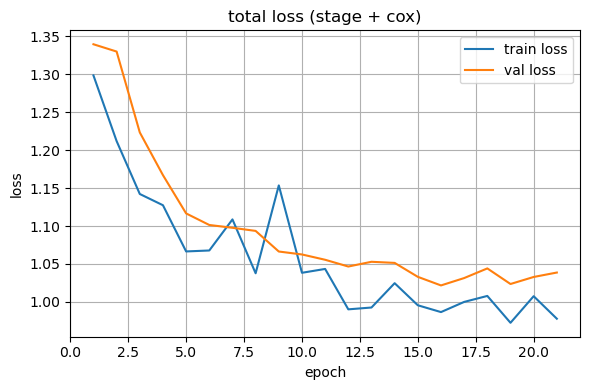

In [29]:
# epoch index
ep = np.arange(1, len(hist["tr_loss"]) + 1)

# total loss plot
plt.figure(figsize=(6,4))
plt.plot(ep, hist["tr_loss"], label="train loss")
plt.plot(ep, hist["va_loss"], label="val loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("total loss (stage + cox)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

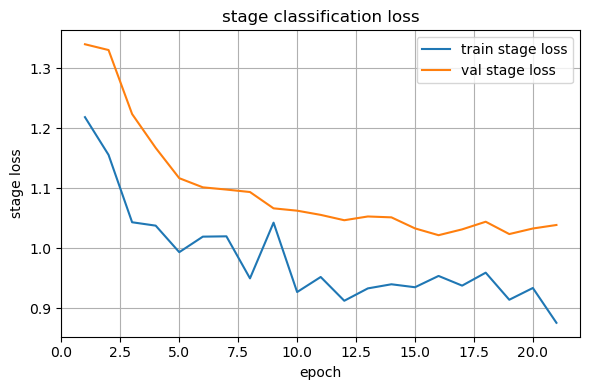

In [30]:
# stage loss plot
plt.figure(figsize=(6,4))
plt.plot(ep, hist["tr_loss_st"], label="train stage loss")
plt.plot(ep, hist["va_loss_st"], label="val stage loss")
plt.xlabel("epoch")
plt.ylabel("stage loss")
plt.title("stage classification loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

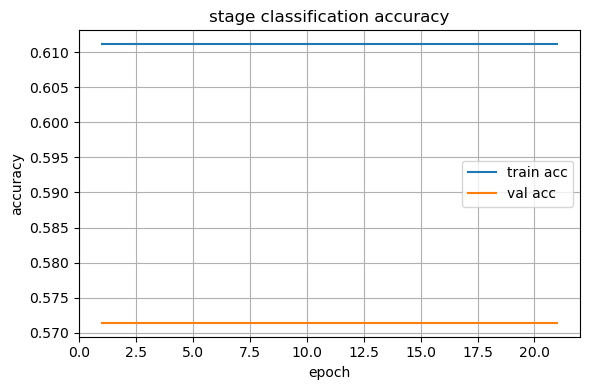

In [31]:
# accuracy
plt.figure(figsize=(6,4))
plt.plot(ep, hist["tr_acc"], label="train acc")
plt.plot(ep, hist["va_acc"], label="val acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("stage classification accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

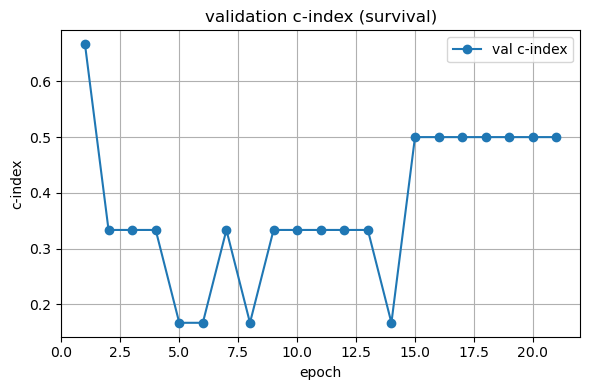

In [32]:
# c-index
plt.figure(figsize=(6,4))
plt.plot(ep, hist["va_cidx"], marker='o', label="val c-index")
plt.xlabel("epoch")
plt.ylabel("c-index")
plt.title("validation c-index (survival)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## XGBoost Clinical Baseline

In [33]:
!pip install xgboost
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [34]:
# base columns for clinical table
base = ["bcr_patient_barcode", "stage_simple", "split"]
miss = [c for c in base if c not in per_pt.columns]

# build clinical df
clin_df = per_pt[base].copy()
clin_df = clin_df.dropna(subset=["stage_simple", "split"])
clin_df = clin_df[clin_df["split"].isin(["train", "val", "test"])]

print("initial clinical table shape:", clin_df.shape)

initial clinical table shape: (32, 3)


In [35]:
# columns to exclude
exc = {"bcr_patient_barcode",
    "stage_simple",
    "stage",
    "os_time_days",
    "os_event",
    "split"}

# feature candidates
cand = [c for c in per_pt.columns if c not in exc]

# select useful features
feat = []
for c in cand:
    col = per_pt[c]
    if col.notna().sum() < 5:
        continue
    if col.dropna().nunique() <= 1:
        continue
    feat.append(c)

In [36]:
# merge selected features into clinical df
clin_df = clin_df.merge(per_pt[["bcr_patient_barcode"] + feat],
    on="bcr_patient_barcode",
    how="left")

print("clinical baseline table with features shape:", clin_df.shape)

clinical baseline table with features shape: (32, 4)


In [37]:
# feature matrix + labels + split info
x_all = clin_df[feat].copy()
y_all = clin_df["stage_simple"].copy()
sp_all = clin_df["split"].copy()

# numeric and categorical feature split
num_cols = x_all.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in feat if c not in num_cols]

In [38]:
# fill missing values
for c in num_cols:
    x_all[c] = x_all[c].astype(float)
    x_all[c] = x_all[c].fillna(x_all[c].median())

for c in cat_cols:
    x_all[c] = x_all[c].astype(str).fillna("unk")

In [39]:
# one-hot encode categorical features
x_enc = pd.get_dummies(x_all, columns=cat_cols, drop_first=True)

In [40]:
# encode stage labels
lab_enc = LabelEncoder()
y_enc = lab_enc.fit_transform(y_all)

print("label classes mapping:", dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_))))

label classes mapping: {'I': 0, 'III': 1, 'IV': 2}


In [41]:
# split masks
tr_m = sp_all == "train"
va_m = sp_all == "val"
te_m = sp_all == "test"

# apply splits
x_tr = x_enc[tr_m]
y_tr = y_enc[tr_m]

x_va = x_enc[va_m]
y_va = y_enc[va_m]

x_te = x_enc[te_m]
y_te = y_enc[te_m]

print("train size:", x_tr.shape, " val size:", x_va.shape, " test size:", x_te.shape)

train size: (18, 1)  val size: (7, 1)  test size: (7, 1)


In [42]:
# xgboost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(lab_enc.classes_),
    tree_method="hist",
    random_state=42)

# fit
xgb_clf.fit(x_tr, y_tr)

# prediction
y_tr_pred = xgb_clf.predict(x_tr)
y_va_pred = xgb_clf.predict(x_va)
y_te_pred = xgb_clf.predict(x_te)

# accuracy
tr_acc = accuracy_score(y_tr, y_tr_pred)
va_acc = accuracy_score(y_va, y_va_pred)
te_acc = accuracy_score(y_te, y_te_pred)

print("\nxgboost clinical baseline")
print(f"train acc: {tr_acc:.3f}")
print(f"val acc:   {va_acc:.3f}")
print(f"test acc:  {te_acc:.3f}")

print("\ntest confusion matrix (stages):")
print(confusion_matrix(y_te, y_te_pred))

print("\nlabel mapping (idx → stage):")
inv = {i: s for i, s in enumerate(lab_enc.classes_)}
print(inv)

print("\nclassification report (test):")
print(classification_report(y_te, y_te_pred, target_names=lab_enc.classes_))


xgboost clinical baseline
train acc: 0.889
val acc:   0.571
test acc:  0.143

test confusion matrix (stages):
[[1 0 3]
 [2 0 0]
 [0 1 0]]

label mapping (idx → stage):
{0: 'I', 1: 'III', 2: 'IV'}

classification report (test):
              precision    recall  f1-score   support

           I       0.33      0.25      0.29         4
         III       0.00      0.00      0.00         2
          IV       0.00      0.00      0.00         1

    accuracy                           0.14         7
   macro avg       0.11      0.08      0.10         7
weighted avg       0.19      0.14      0.16         7



## Save & Test the Model

In [43]:
device = torch.device("cpu")

# build model
model = mil_res(n_sl=9, n_st=4).to(device)

In [44]:
model.load_state_dict(torch.load("tumor_model.pth", map_location=device))

<All keys matched successfully>

In [45]:
# make sure device, model, c_index, run_ep, te_ld are already defined
test_stats = run_ep(model, te_ld, opt, tr=False)

print("Test performance of MIL model")
print(f"Test loss:      {test_stats["loss"]:.3f}")
print(f"Test stage acc: {test_stats["acc"]:.3f}")
print(f"Test C-index:   {test_stats["c_index"]:.3f}")

Test performance of MIL model
Test loss:      1.038
Test stage acc: 0.571
Test C-index:   0.833
